# Chapter 5 - Experimental results - Grayscale

In this Jupyter notebook we present the Validation accuracy, Validation loss charts and the confusion matrices on the test data. \

We added 3 layers to fine tune the pre-trained models:
the original output layer (a 1000 neuron fully connected dense layer) was removed, a GlobalAveragePooling2D and a 
fully connected Dense layer whith 1024 neurons was added (using a ReLu activation function) and a fully connected prediction layer whith 8 neurons (using as SoftMax activation function ) was added.


Image augmentation samplewise_center=True, samplewise_std_normalization=True See https://software.intel.com/content/www/us/en/develop/articles/hands-on-ai-part-14-image-data-preprocessing-and-augmentation.html


In [5]:
import os
import shutil
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image, Markdown
%matplotlib inline

[**Index**]\
[Fine tuned training results](#Fine-tuned-training-results) \
[Confusion Matrix](#Confusion-matrix) \
[Classification reports](#Classification-reports)

[Best Scores](#Best-scores)

# Implemented models

A list of all implemented models.

In [9]:
models  = [
	'ResNet50',
	'ResNet50V2',
	'ResNet101V2',
    'ResNet152V2',
	'InceptionV3',
	'Xception',
	'VGG16',
	'VGG19',
	'MobileNet',
	'MobileNetV2',
	'EfficientNetB7',
	'InceptionResNetV2',
	'DenseNet121',
	'NASNetLarge',
]

In [21]:
# retive data to be posted on github DO NOT USE!!!!
base = '/home/labuser/deeplearning/thesis/solutions/compare-dnn/results-gray'
for model in models:
    print('importing results from %s' % model)
    shutil.copyfile(os.path.join(base, model,model+'_testresults.pkl'),os.path.join(os.getcwd(),'data','gray',model+'_testresults.pkl'))
    shutil.copyfile(os.path.join(base, model,model+'_training.log'),os.path.join(os. getcwd(),'data','gray',model+'_training.log'))
    shutil.copyfile(os.path.join(base, model,model+'_cm.png'),os.path.join(os.getcwd(),'data','gray',model+'_cm.png'))
    shutil.copyfile(os.path.join(base, model,model+'_learn_plot_accuracy.png'),os.path.join(os.getcwd(),'data','gray',model+'_learn_plot_accuracy.png'))
    shutil.copyfile(os.path.join(base, model,model+'_learn_plot_loss.png'),os.path.join(os.getcwd(),'data','gray',model+'_learn_plot_loss.png')) 
    shutil.copyfile(os.path.join(base, model,model+'_classification_report.pkl'),os.path.join(os.getcwd(),'data','gray',model+'_classification_report.pkl'))


importing results from ResNet50
importing results from ResNet50V2
importing results from ResNet101V2
importing results from ResNet152V2
importing results from InceptionV3
importing results from Xception
importing results from VGG16
importing results from VGG19
importing results from MobileNet
importing results from MobileNetV2
importing results from EfficientNetB7
importing results from InceptionResNetV2
importing results from DenseNet121
importing results from NASNetLarge


## Fine tuned training results 

Using a pre-trained model trained 50 epochs on our processed VT ransowmare DataSet with ImageNet Weights \
The input tensor: \
224 x 224 x 1 = features \
299 x 299 x 1 = features \
311 x 311 x 1 = features \
We set the minimum image size to 112 x 112 x 1 to limit the effects of rescaling (reshape and resize) images. Because smaller images tend to distort if they are upscalled and making the training less effective.

Training scores max. 50 epochs and batch size 64 - dataset split 80% 20% 10%

## Validation accuracy - Fine tuned models

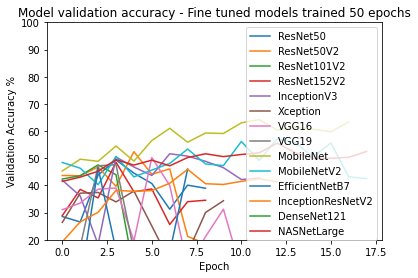

In [23]:
plt.title('Model validation accuracy - Fine tuned models trained 50 epochs')
for model in models:
    result = pd.read_csv(os.path.join(os. getcwd(),'data','gray',model + '_training.log'))
    plt.plot(result.val_accuracy * 100 , label=model)
plt.ylabel('Validation Accuracy %')
plt.xlabel('Epoch')
plt.ylim([20, 100])
plt.legend(loc=0)
plt.savefig('all_models_val_accuracy_gray.png')
plt.show()

## Validation loss - fine tuned models

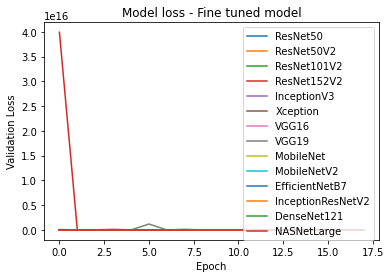

In [24]:
plt.title('Model loss - Fine tuned model')
for model in models:
    result = pd.read_csv(os.path.join(os. getcwd(),'data','gray',model + '_training.log'))
    plt.plot(result.val_loss, label=model)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.savefig('all_models_val_loss_gray.png')
plt.show()

## Testset - accuracy and loss reports

The accuracy and loss reults on the testdataset

In [25]:
#combine test results
testdata = {}
for model in models:
    print('importing results from %s' % model)
    testdata[model]=pd.read_pickle((os.path.join(os. getcwd(),'data','gray',model + '_testresults.pkl')))


importing results from ResNet50
importing results from ResNet50V2
importing results from ResNet101V2
importing results from ResNet152V2
importing results from InceptionV3
importing results from Xception
importing results from VGG16
importing results from VGG19
importing results from MobileNet
importing results from MobileNetV2
importing results from EfficientNetB7
importing results from InceptionResNetV2
importing results from DenseNet121
importing results from NASNetLarge


In [26]:
dataresults = pd.concat(testdata,axis=0)
dataresults = dataresults.round(decimals=4) # 4 signficant numbers

In [38]:
# Minimum of 80 procent
dataresults[dataresults['test acc'].ge(0.8)].sort_values(by=['test acc','test loss'],ascending=False) 

,,test loss,test acc


In [39]:
#Test accuracy_scores 
high = dataresults['test acc'].max()
print(dataresults['test acc'].max())

0.6514


## Classification reports

The classification reports of the best scoring models.The model with the best val_accuracy is: MobileNet and MobileNetV2

In [40]:
class_report = {}
for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet152V2','ResNet50','InceptionV3']:
    print('importing results from %s' % model)
    class_report[model] = pd.read_pickle((os.path.join(os.getcwd(),'data','gray',model + '_classification_report.pkl')))

importing results from MobileNet
importing results from InceptionResNetV2
importing results from NASNetLarge
importing results from ResNet152V2
importing results from ResNet50
importing results from InceptionV3


In [41]:
class_report_data = pd.concat(class_report,axis=0)
class_report_data['accuracy']

MobileNet          precision    0.651446
                   recall       0.651446
                   f1-score     0.651446
                   support      0.651446
InceptionResNetV2  precision    0.456621
                   recall       0.456621
                   f1-score     0.456621
                   support      0.456621
NASNetLarge        precision    0.585997
                   recall       0.585997
                   f1-score     0.585997
                   support      0.585997
ResNet152V2        precision    0.494673
                   recall       0.494673
                   f1-score     0.494673
                   support      0.494673
ResNet50           precision    0.491629
                   recall       0.491629
                   f1-score     0.491629
                   support      0.491629
InceptionV3        precision    0.519026
                   recall       0.519026
                   f1-score     0.519026
                   support      0.519026
Name: accuracy, 

Show the best scoring models

In [42]:
pd.read_pickle(os.path.join(os.getcwd(),'data','gray','MobileNet_classification_report.pkl'))

,benign,cerber,crowti,gandcrab,genasom,locky,tescrypt,wannacrypt,accuracy,macro avg,weighted avg
precision,0.448276,0.756757,0.649123,0.712963,0.290323,0.442623,0.772727,0.157895,0.651446,0.528836,0.671573
recall,0.456140,0.571429,0.660714,0.747573,0.428571,0.500000,0.719870,0.300000,0.651446,0.548037,0.651446
f1-score,0.452174,0.651163,0.654867,0.729858,0.346154,0.469565,0.745363,0.206897,0.651446,0.532005,0.659132
support,57.000000,49.000000,56.000000,103.000000,21.000000,54.000000,307.000000,10.000000,0.651446,657.000000,657.000000


In [43]:
pd.read_pickle(os.path.join(os.getcwd(),'data','gray','MobileNetV2_classification_report.pkl'))

,benign,cerber,crowti,gandcrab,genasom,locky,tescrypt,wannacrypt,accuracy,macro avg,weighted avg
precision,0.647059,0.894737,0.526316,0.719101,0.411765,0.210938,0.760274,0.190476,0.598174,0.545083,0.669120
recall,0.385965,0.346939,0.535714,0.621359,0.333333,0.500000,0.723127,0.400000,0.598174,0.480805,0.598174
f1-score,0.483516,0.500000,0.530973,0.666667,0.368421,0.296703,0.741235,0.258065,0.598174,0.480698,0.615465
support,57.000000,49.000000,56.000000,103.000000,21.000000,54.000000,307.000000,10.000000,0.598174,657.000000,657.000000


## Confusion matrix

An overview of all Confusion matrices by models

In [44]:
cms={}
for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet152V2','ResNet50','InceptionV3']:
    cms[model]= os.path.join(os.getcwd(),'data','gray',model+'_cm.png')
   

## MobileNet

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/MobileNet_cm.png


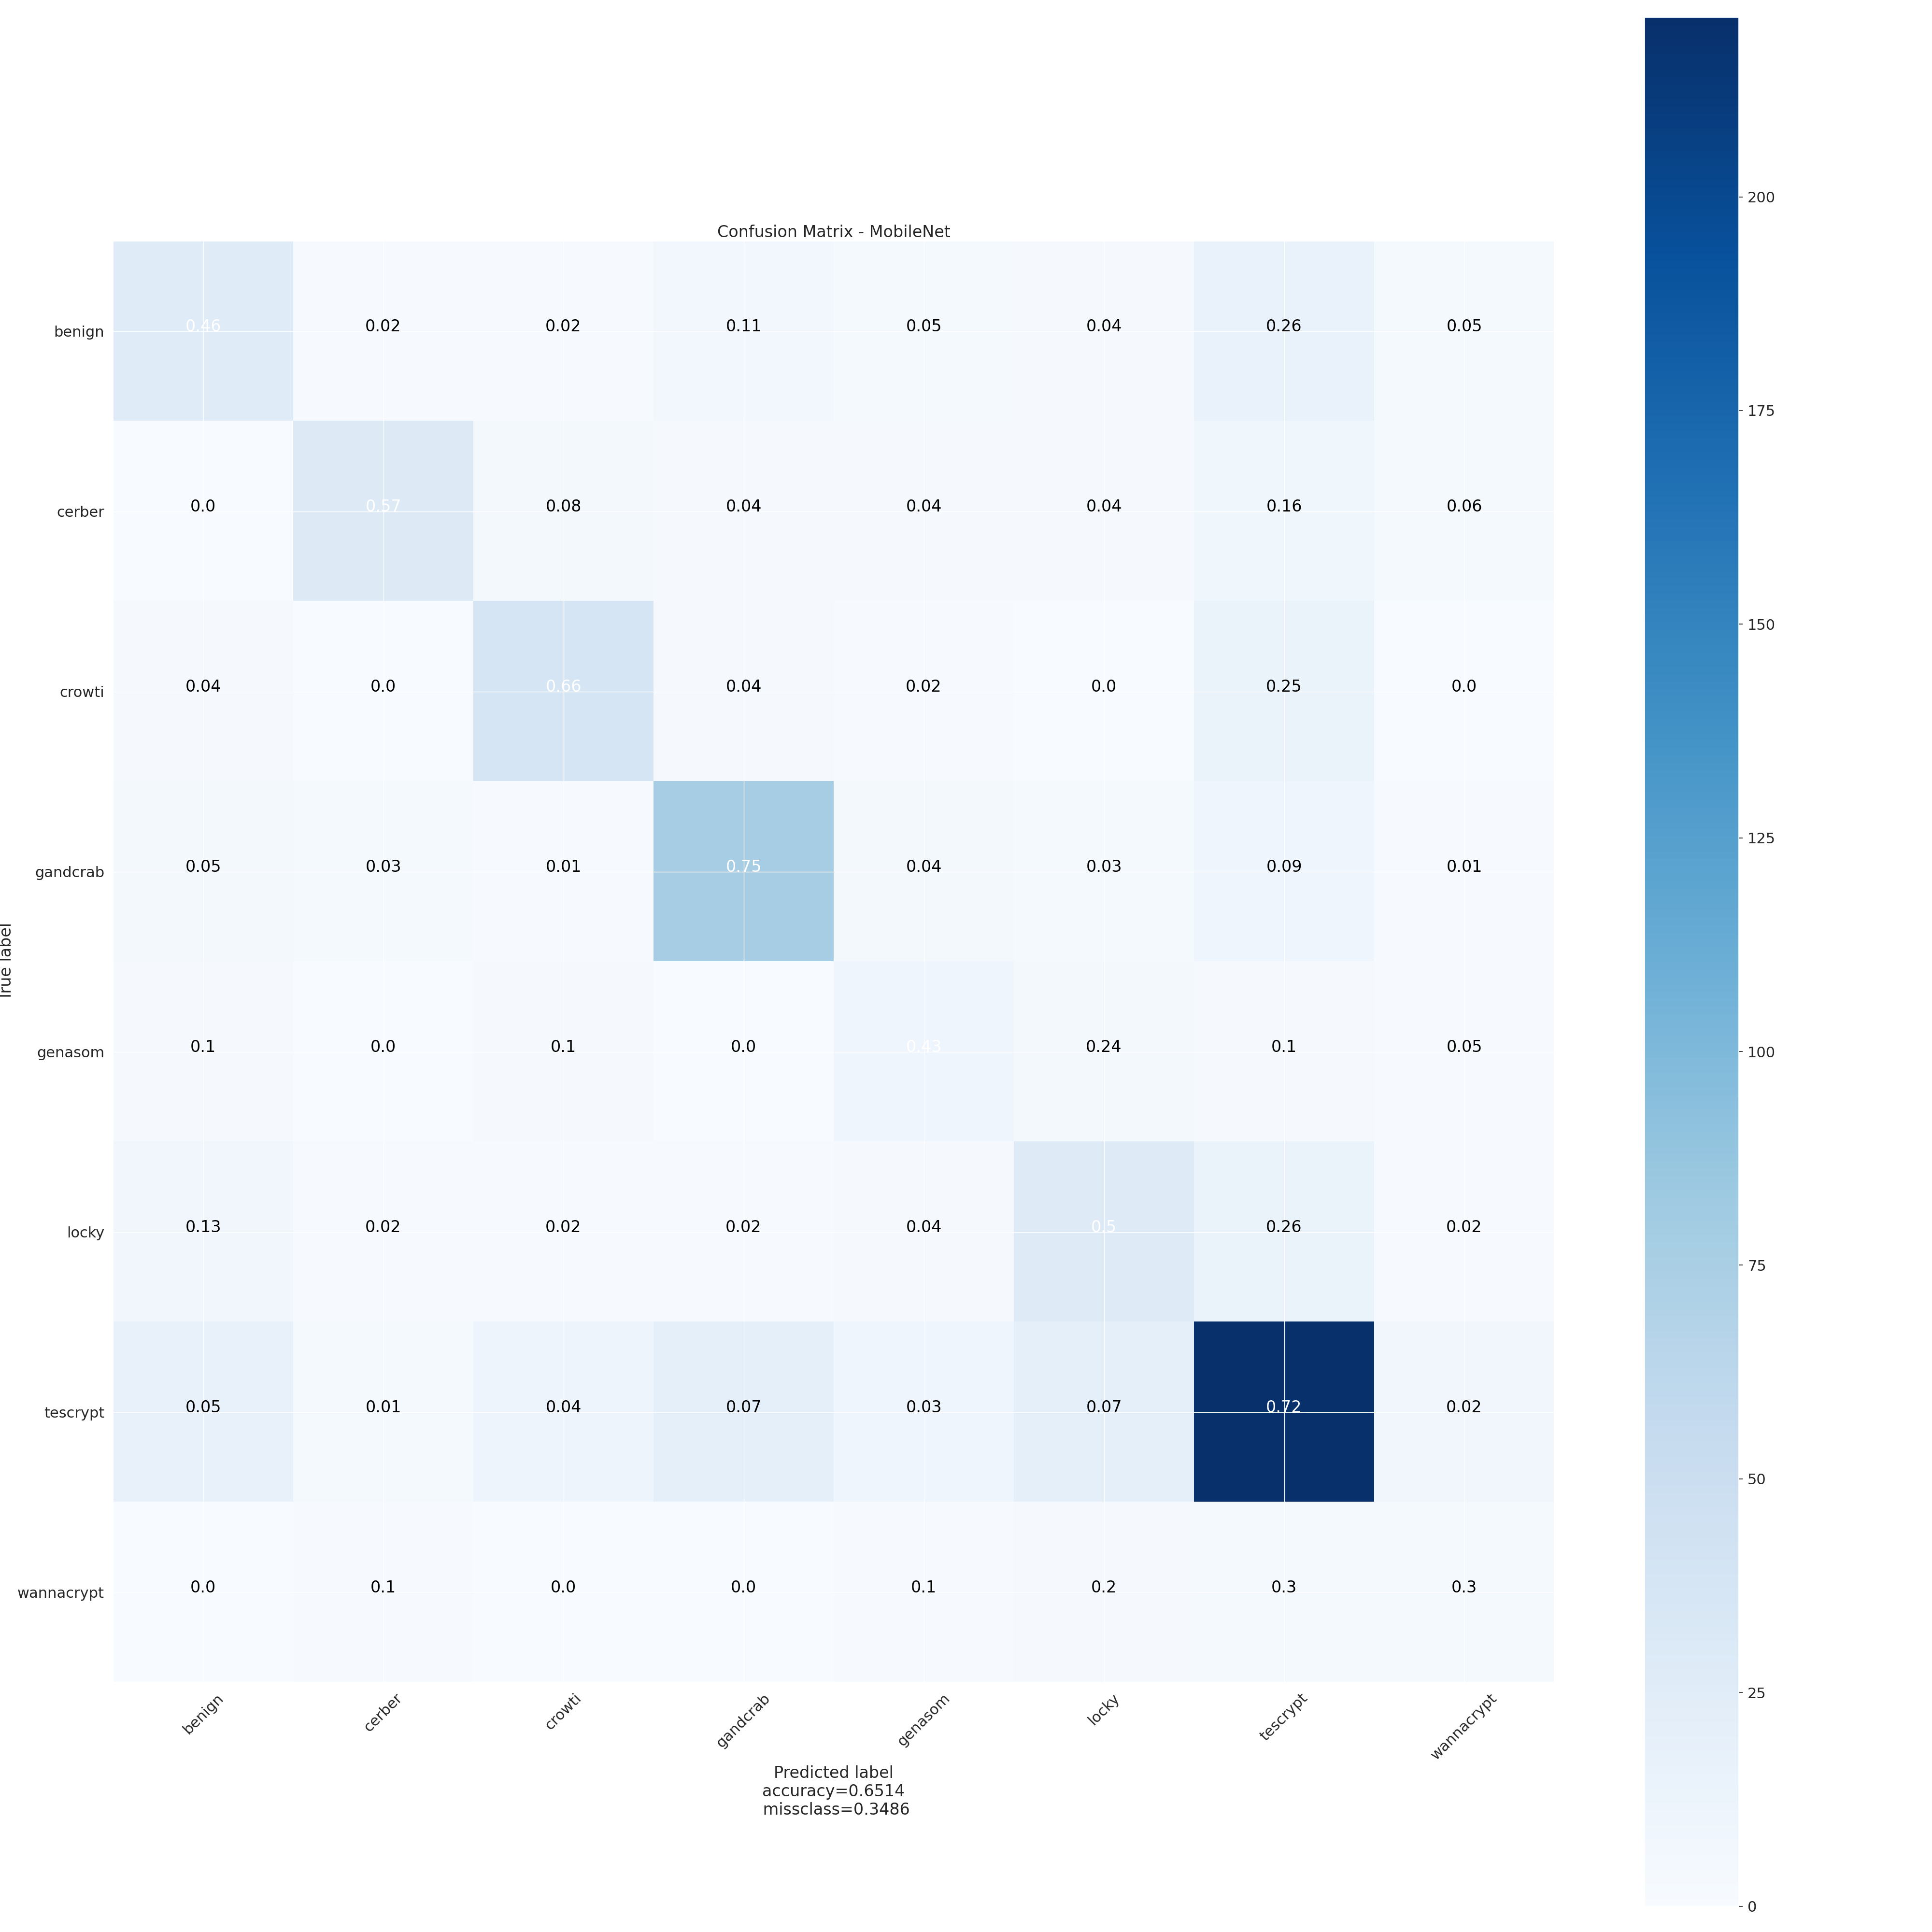

## InceptionResNetV2

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/InceptionResNetV2_cm.png


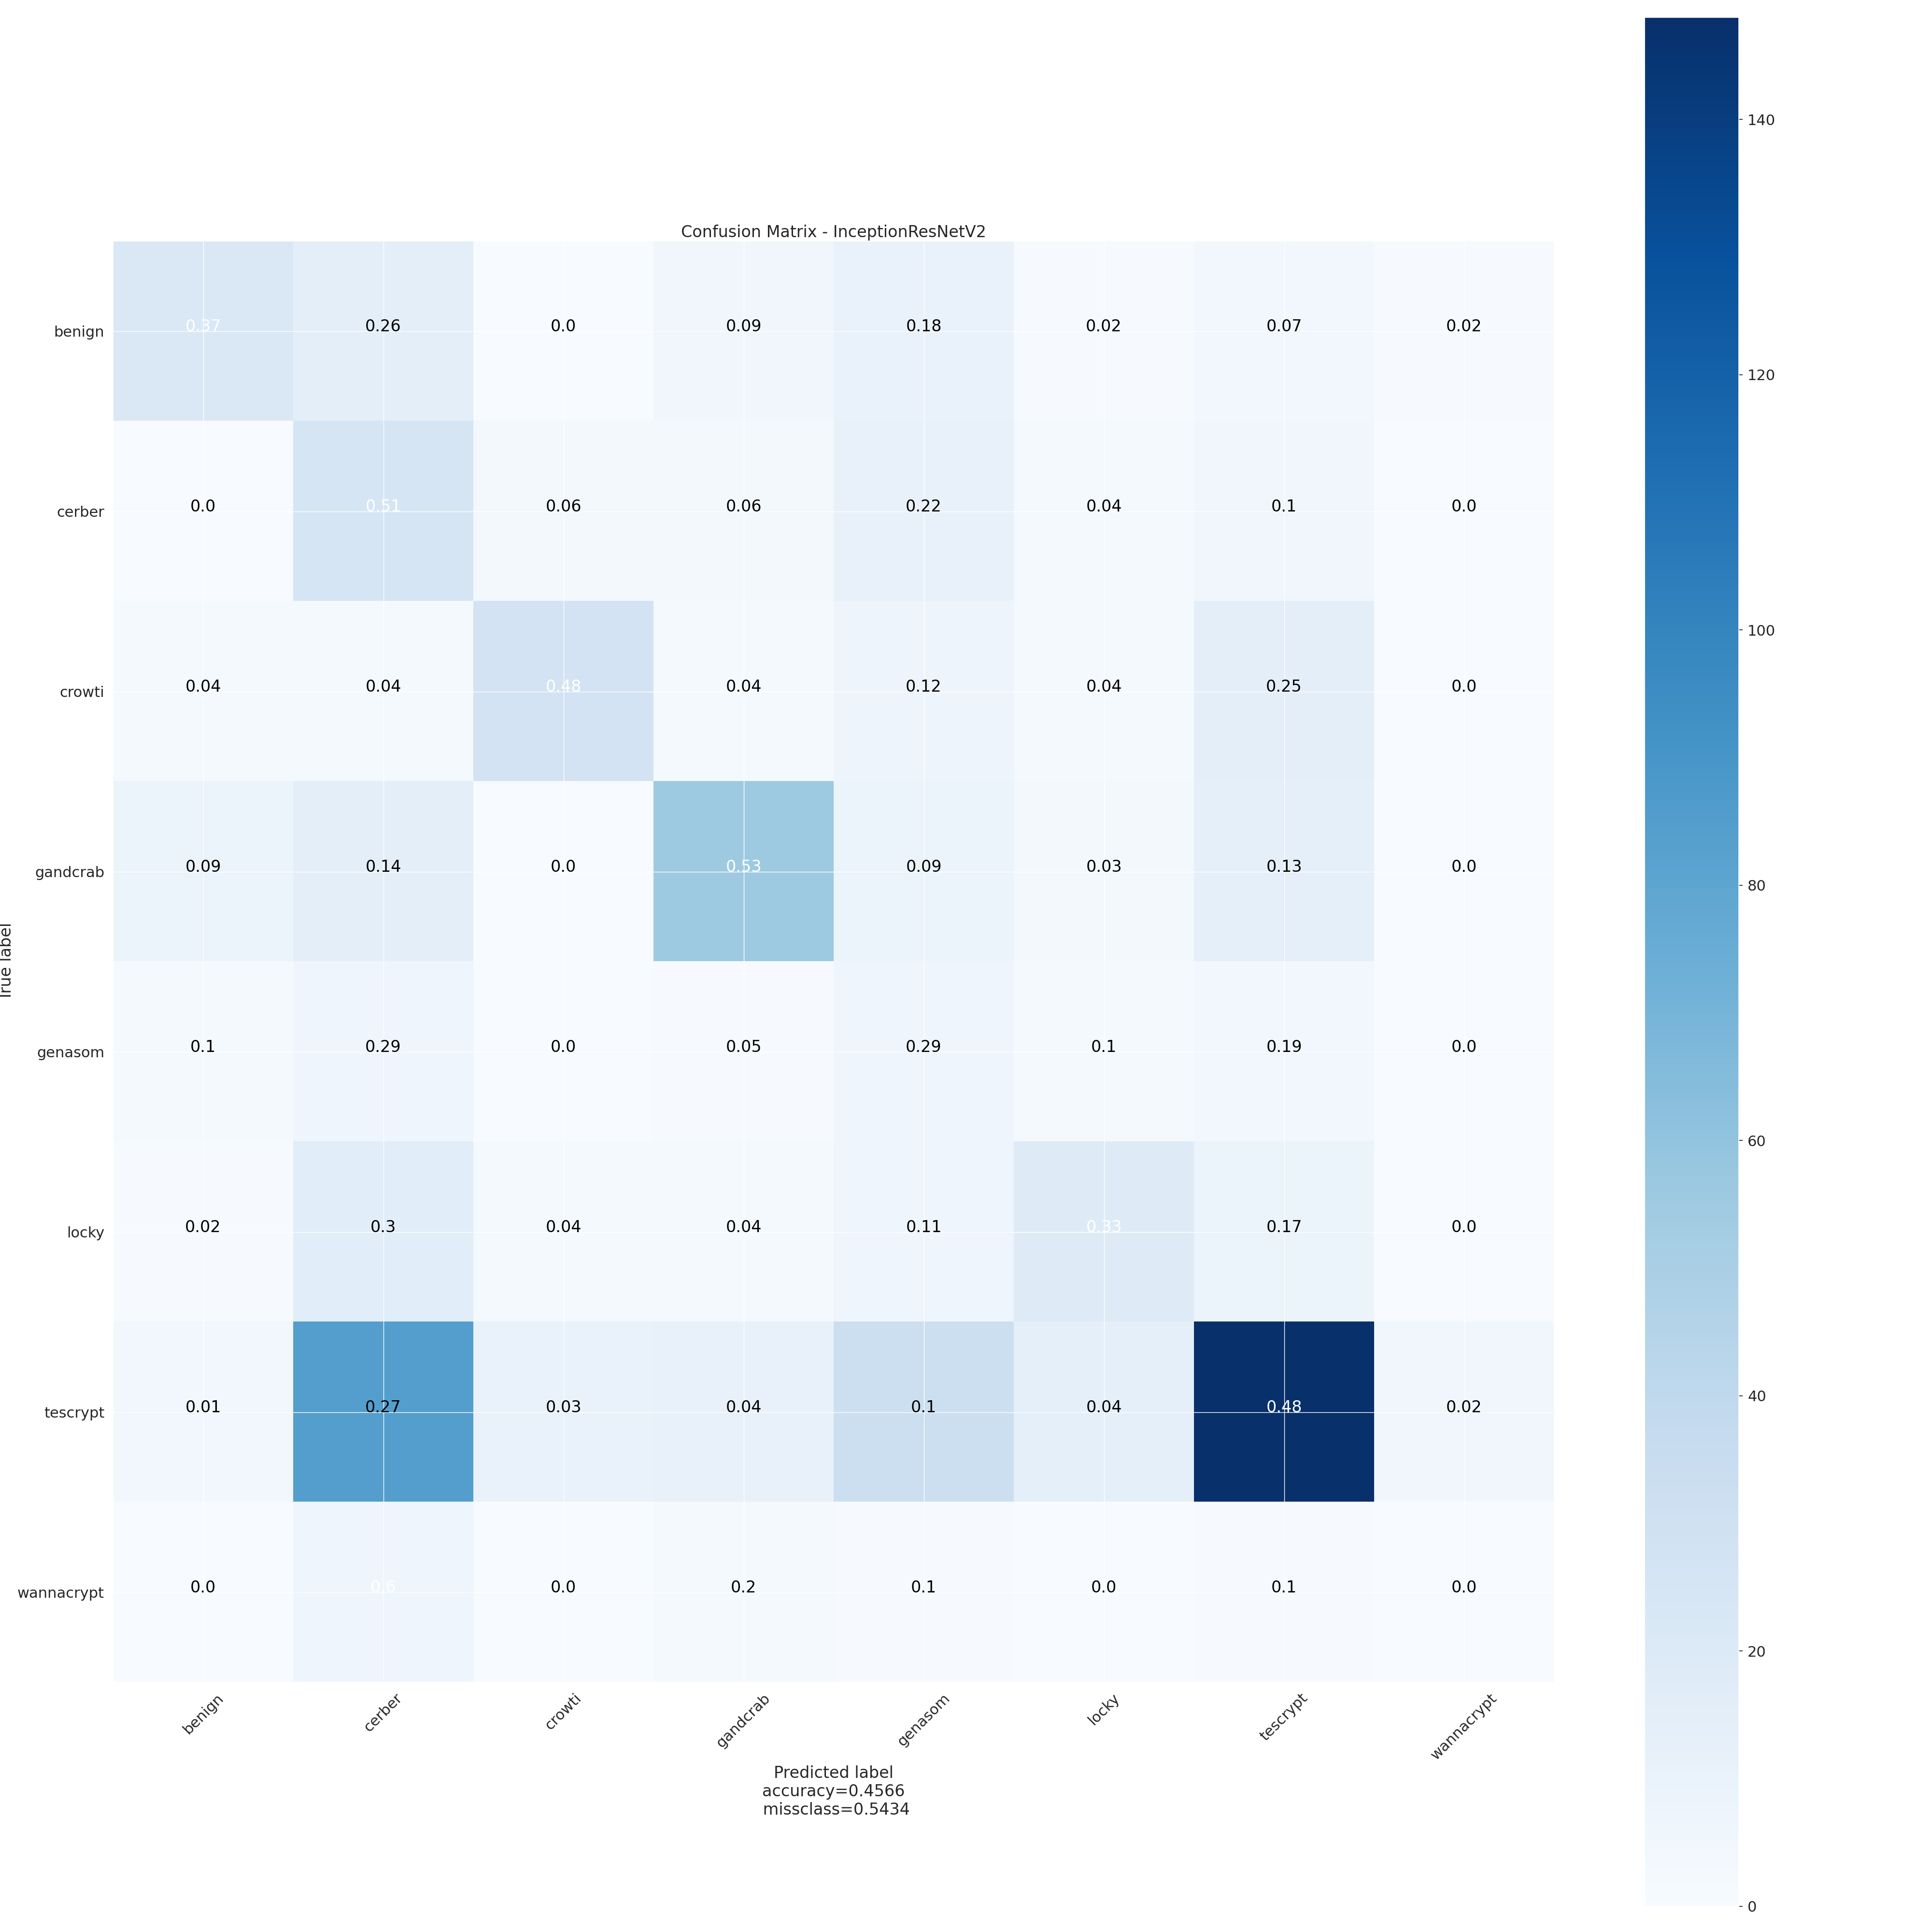

## NASNetLarge

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/NASNetLarge_cm.png


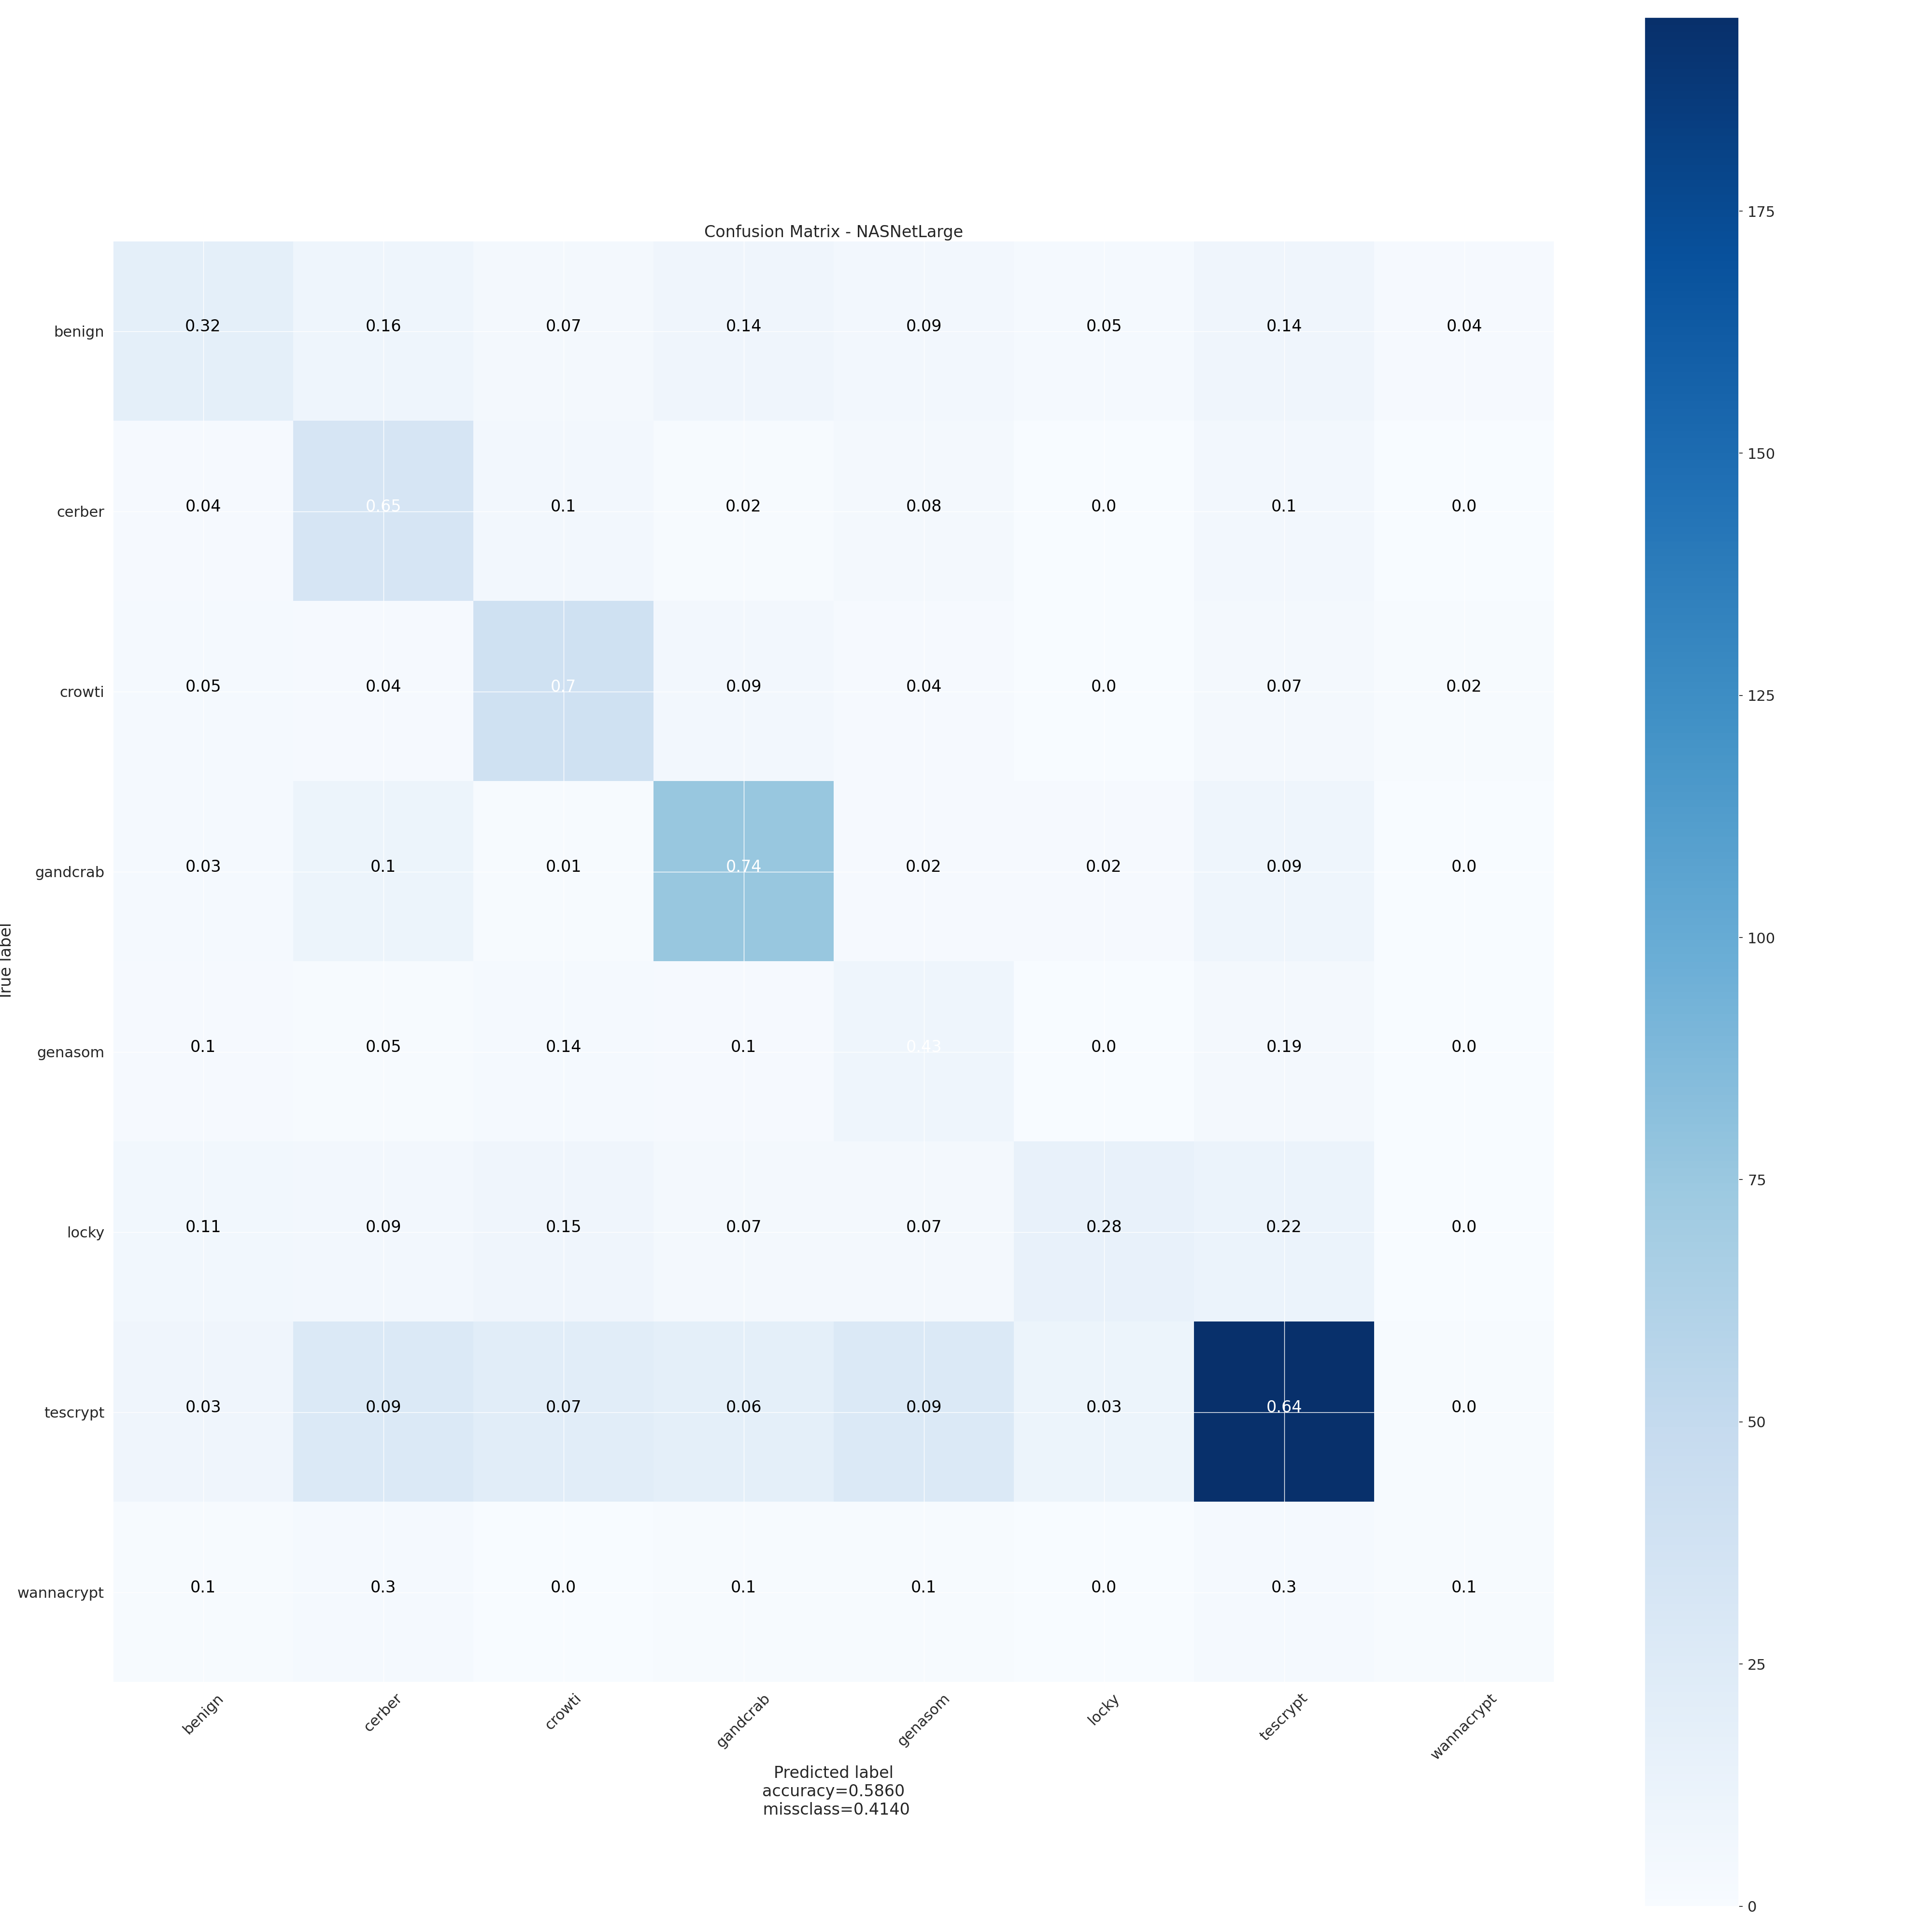

## ResNet152V2

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/ResNet152V2_cm.png


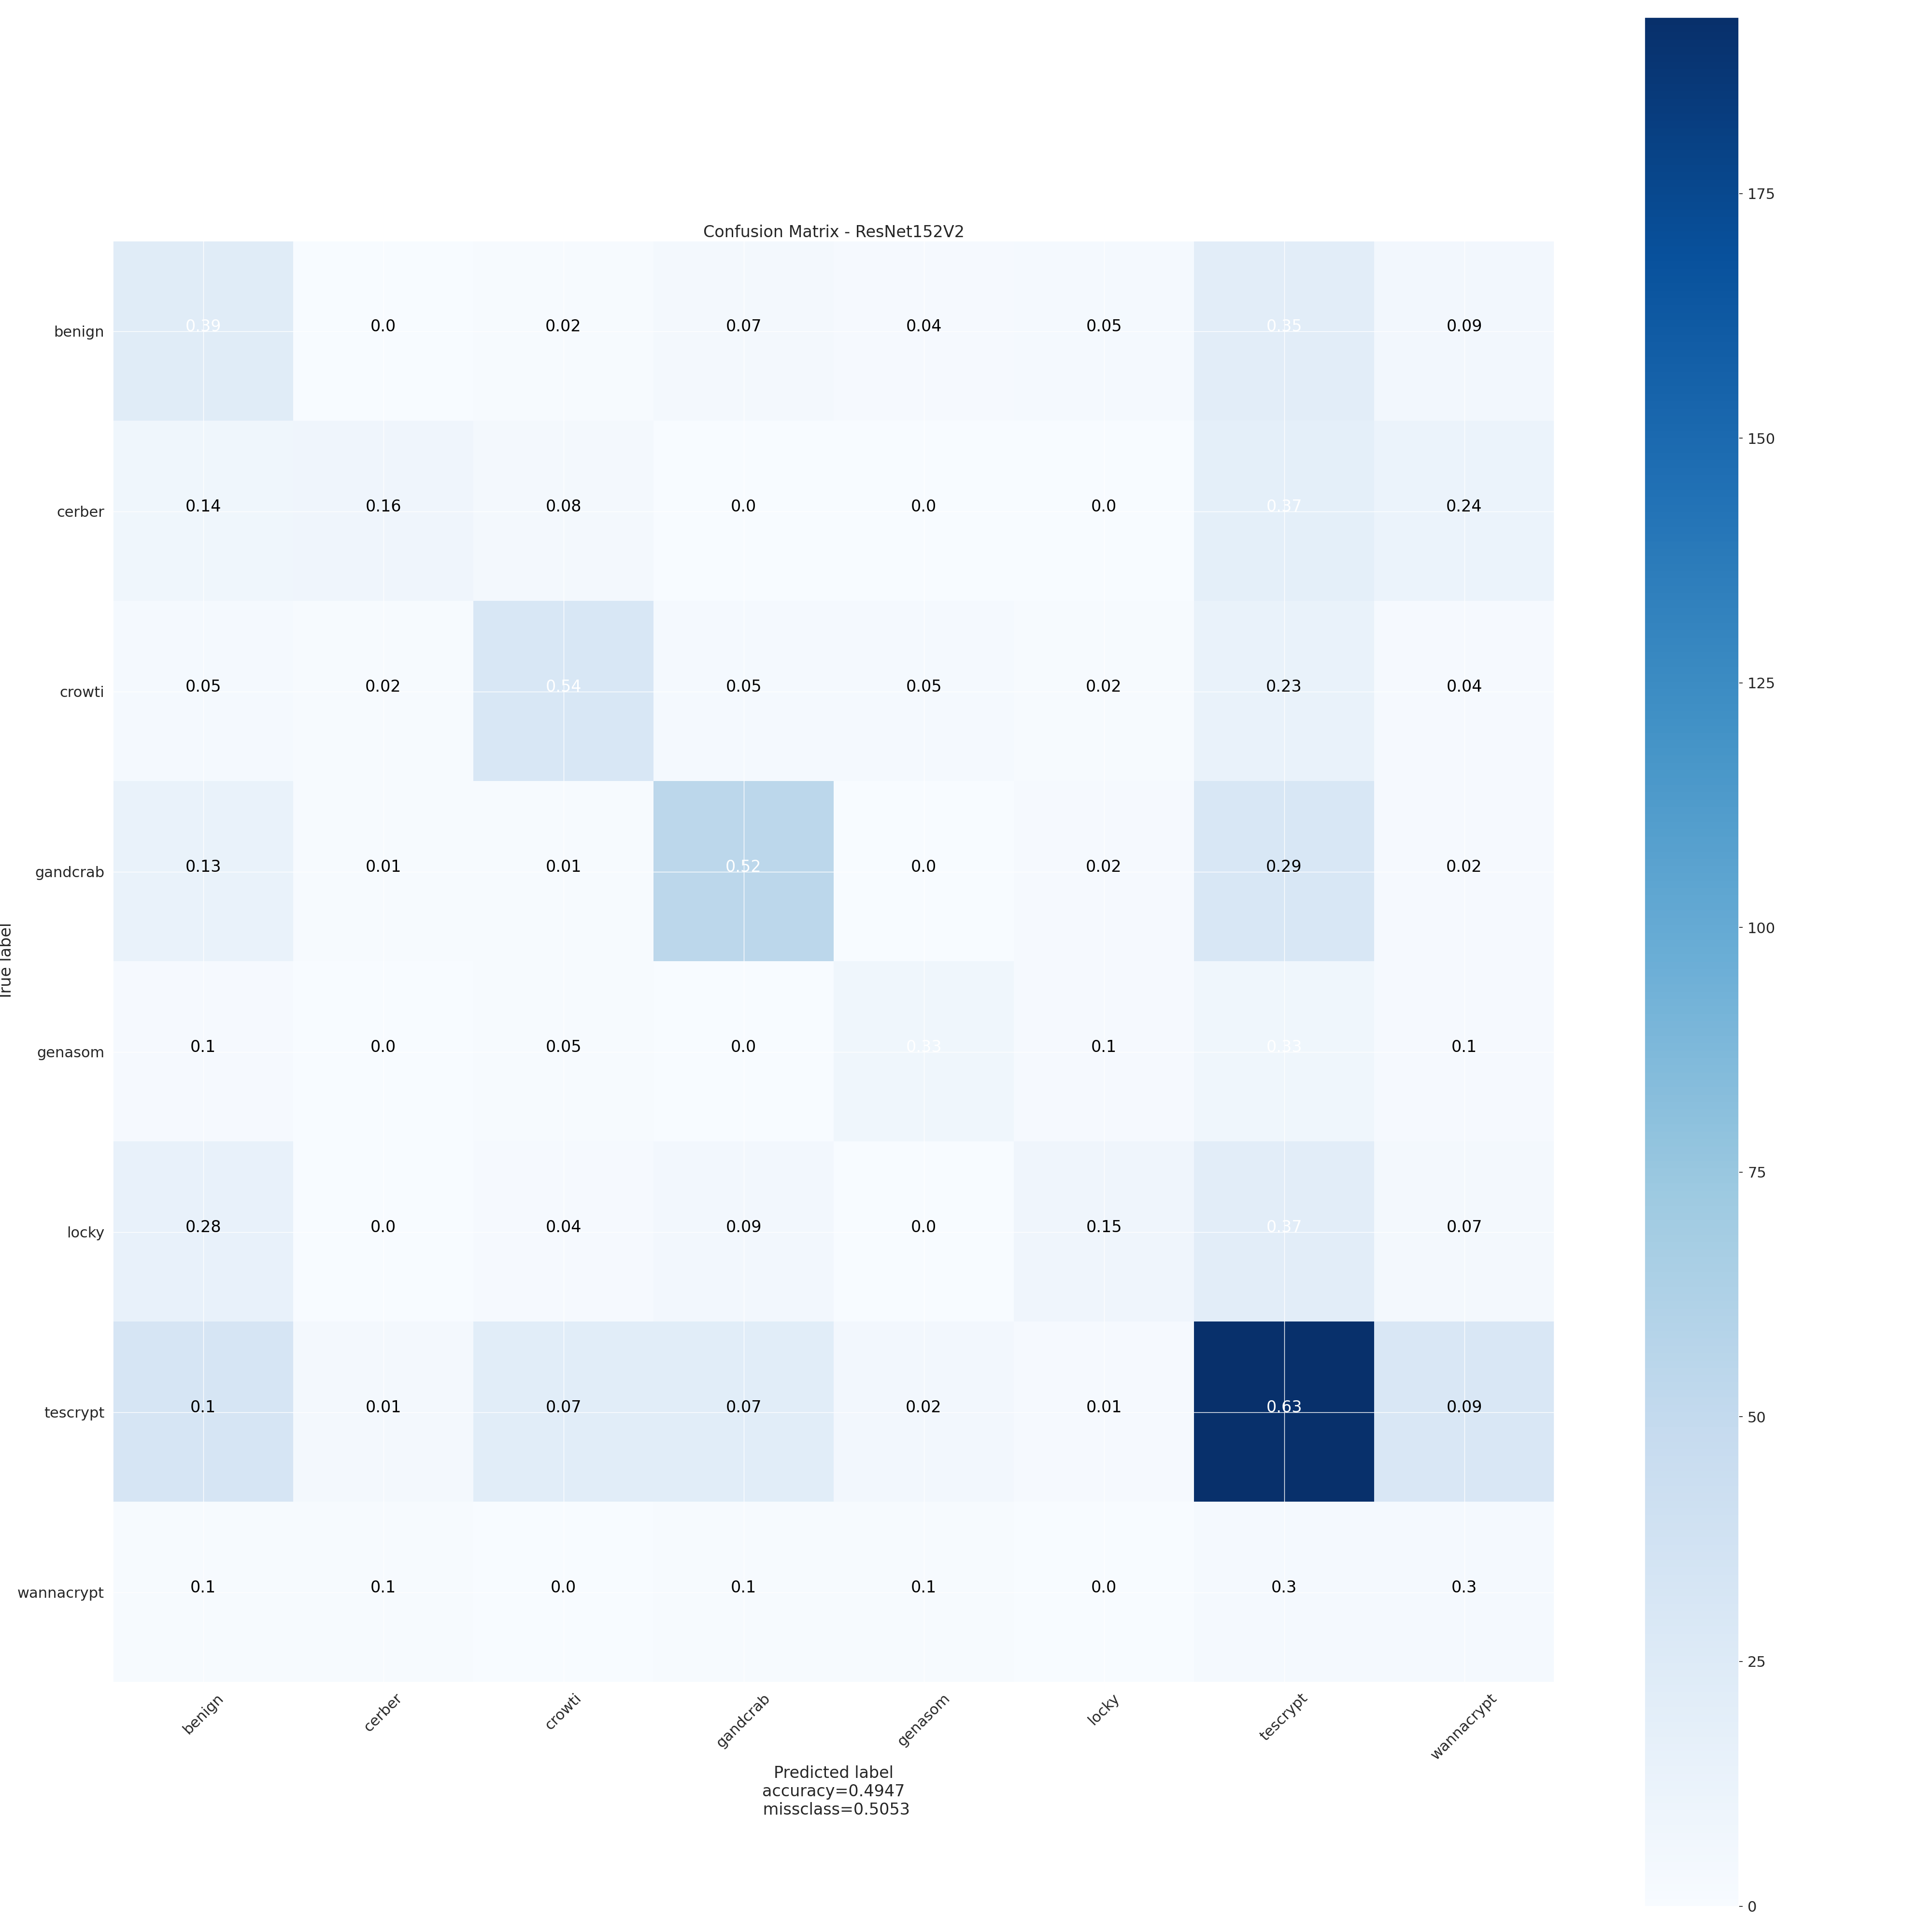

## ResNet50

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/ResNet50_cm.png


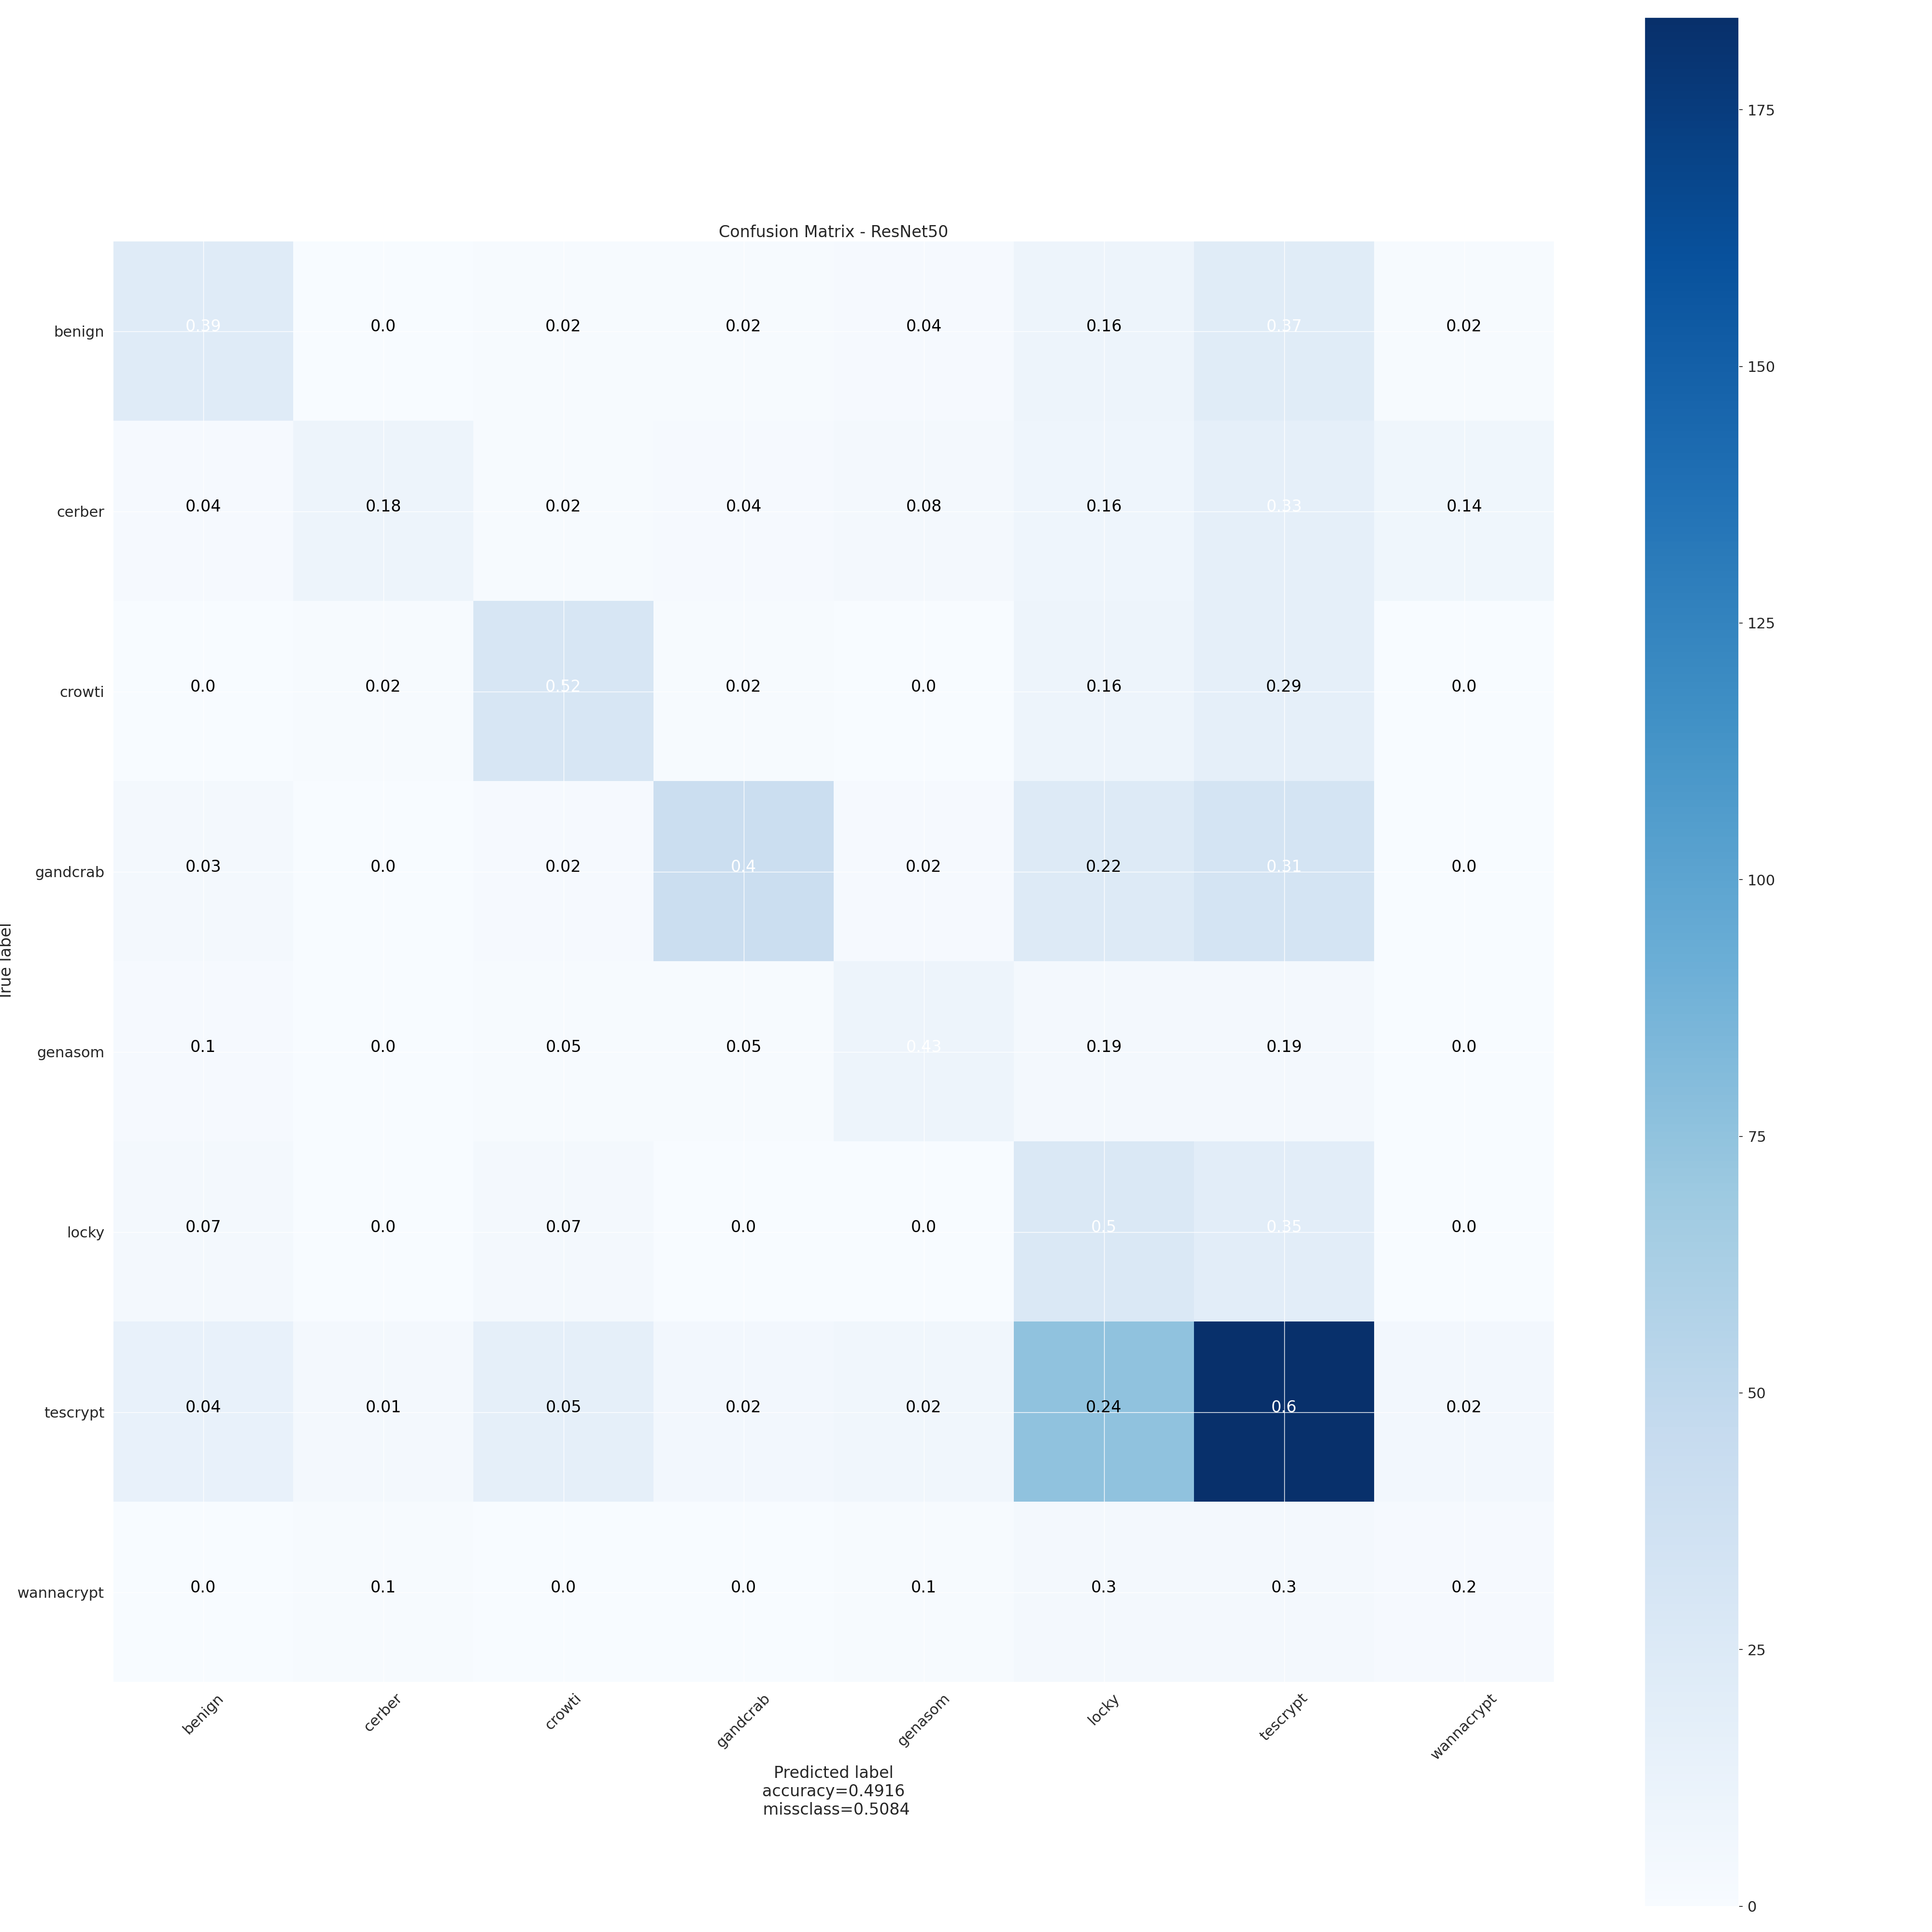

## InceptionV3

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/InceptionV3_cm.png


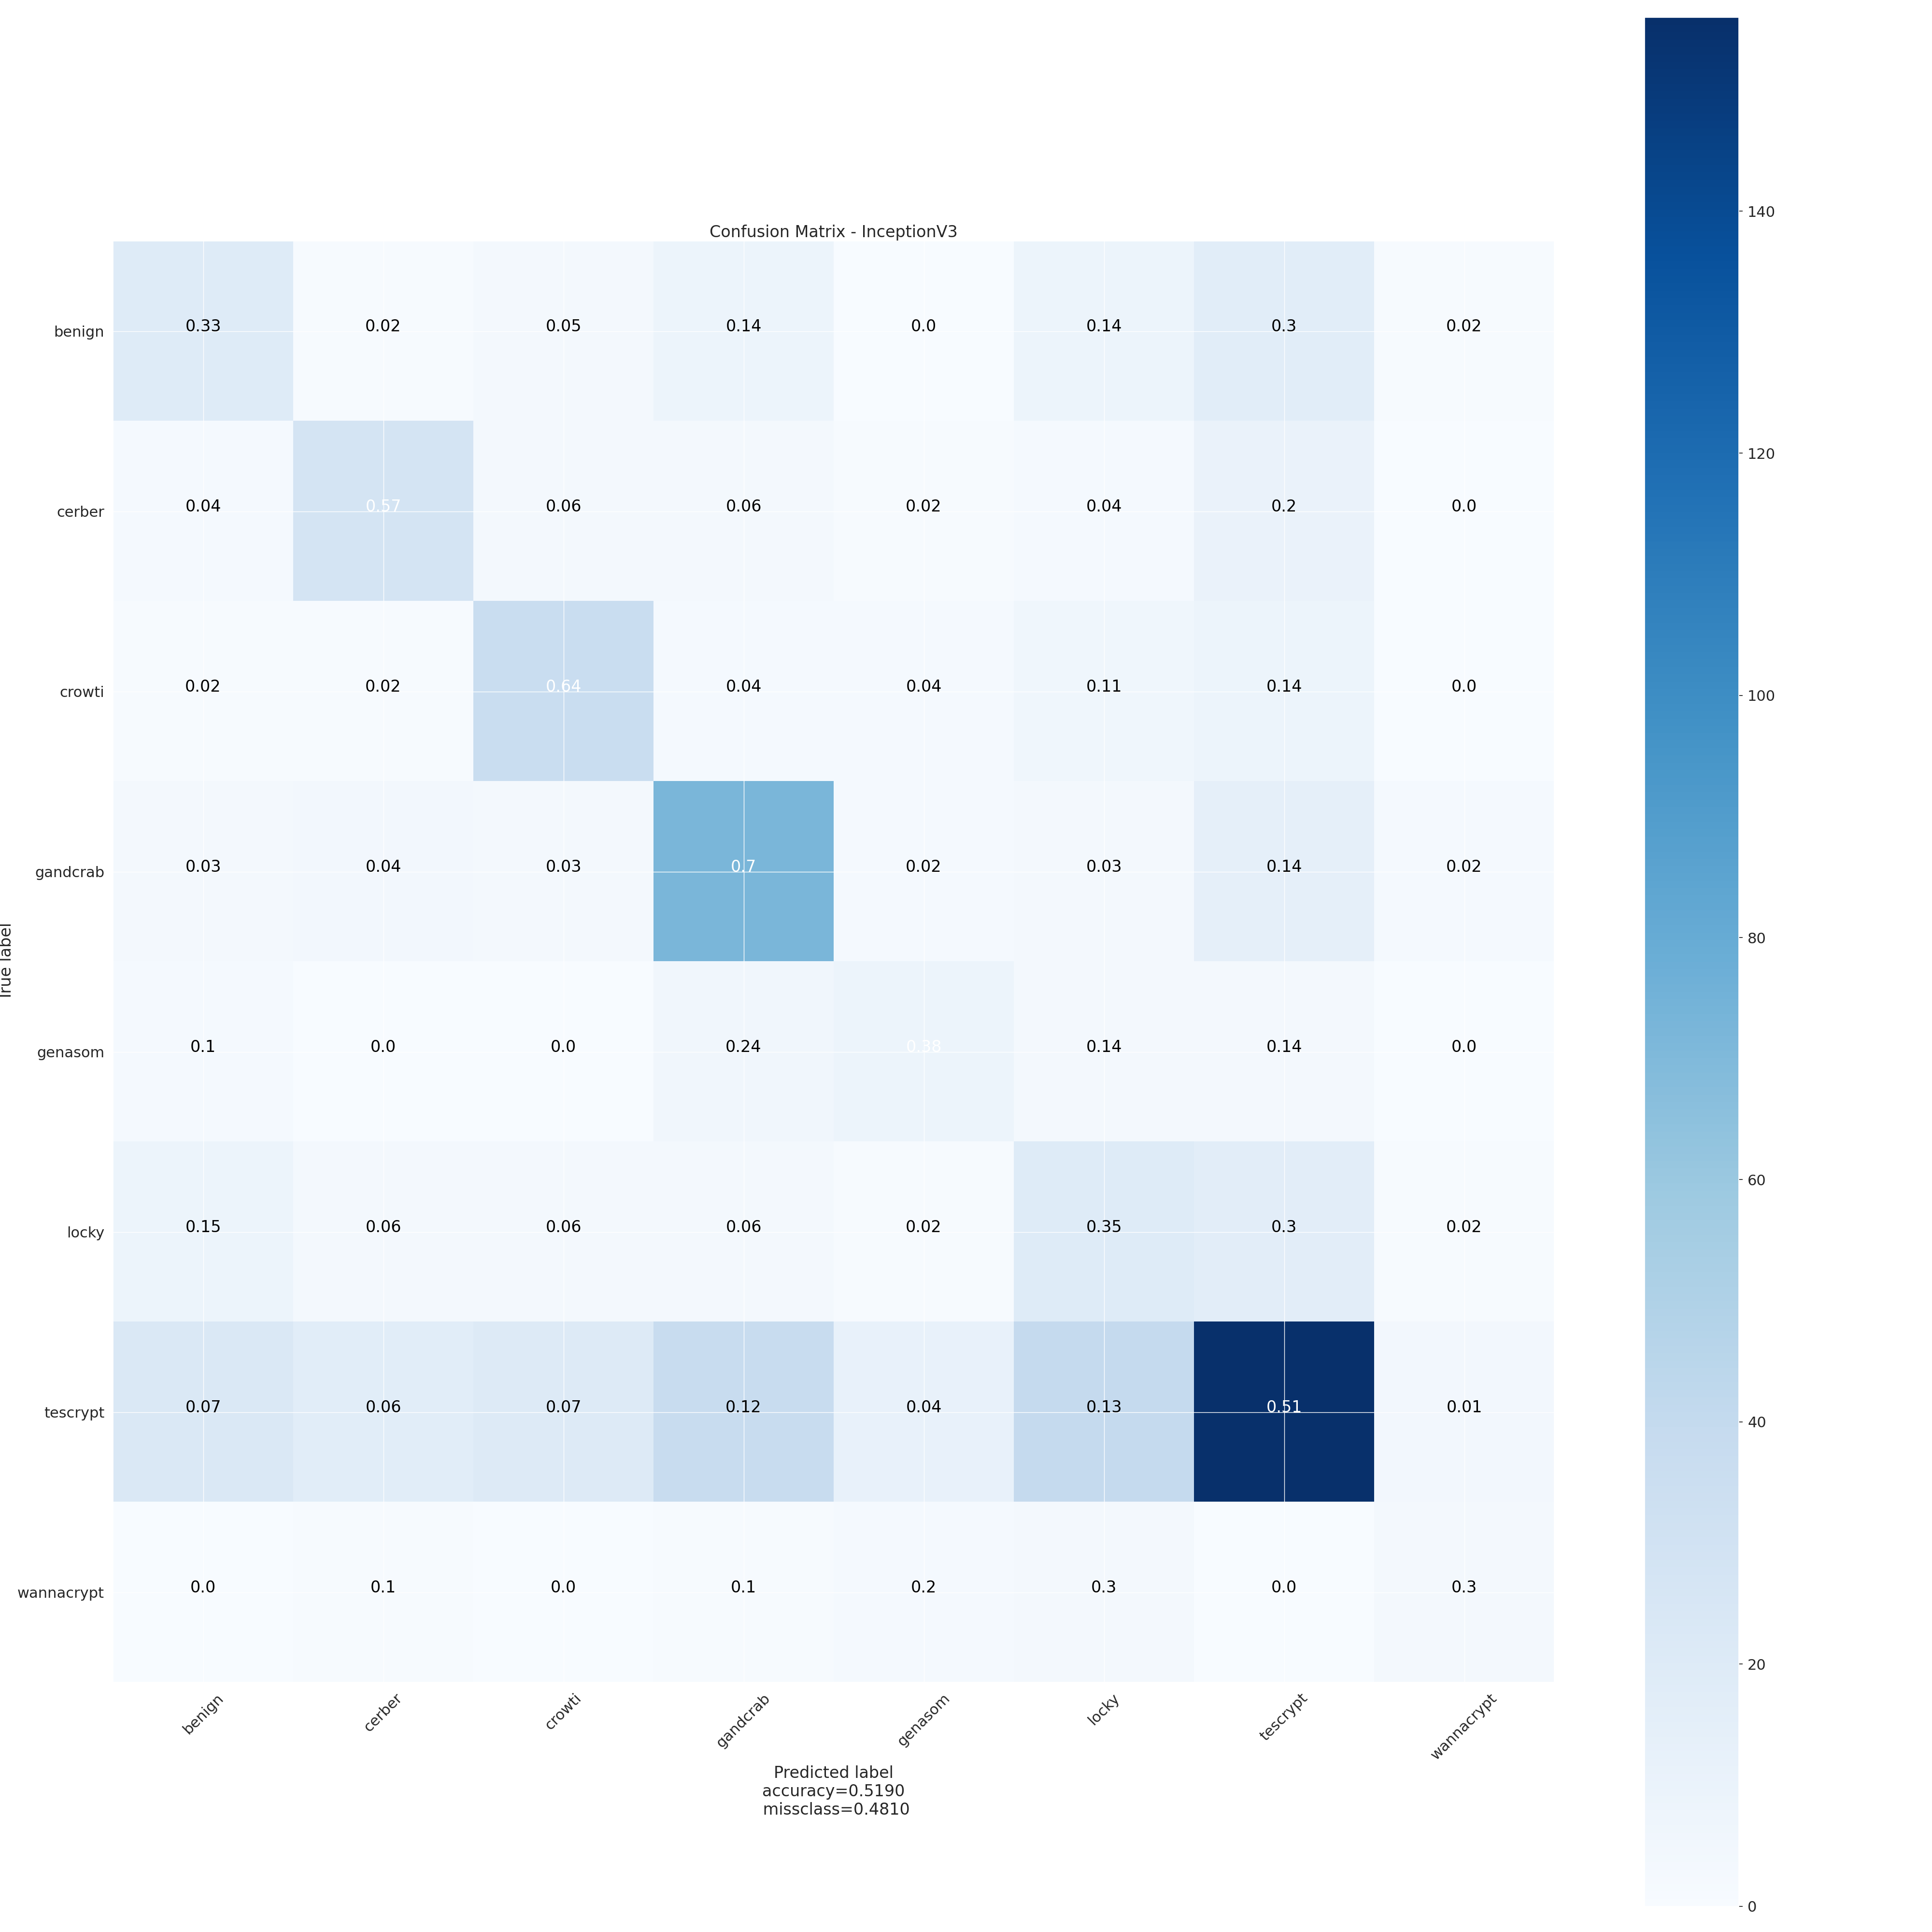

In [45]:
for model in cms:
    display(Markdown('## '+model))
    print(cms[model])
    display(Image(filename=cms[model]))

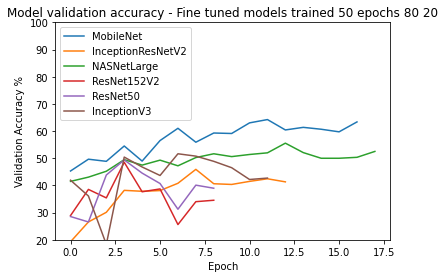

In [46]:
plt.title('Model validation accuracy - Fine tuned models trained 50 epochs 80 20')
for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet152V2','ResNet50','InceptionV3']:
    result = pd.read_csv(os.path.join(os.getcwd(),'data','gray',model+'_training.log'))
    plt.plot(result.val_accuracy * 100 , label=model)
plt.ylabel('Validation Accuracy %')
plt.xlabel('Epoch')
plt.ylim([20, 100])
plt.legend(loc=0)
plt.show()

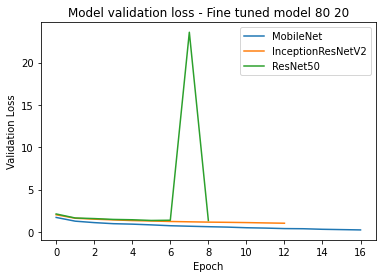

In [47]:
plt.title('Model validation loss - Fine tuned model 80 20')
#for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet152V2','ResNet50','InceptionV3']:
#for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet50','InceptionV3']:
#for model in['MobileNet','InceptionResNetV2','ResNet50','InceptionV3']:
for model in['MobileNet','InceptionResNetV2','ResNet50']:
    result = pd.read_csv(os.path.join(os.getcwd(),'data','gray',model+'_training.log'))
    #plt.plot(result.val_loss, label=model)
    plt.plot(result.loss, label=model)
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

## MobileNet

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/MobileNet_cm.png


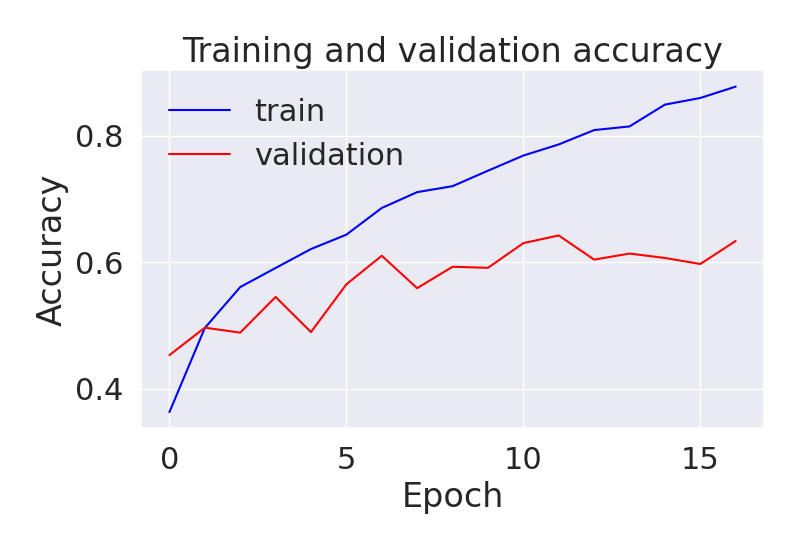

## InceptionResNetV2

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/InceptionResNetV2_cm.png


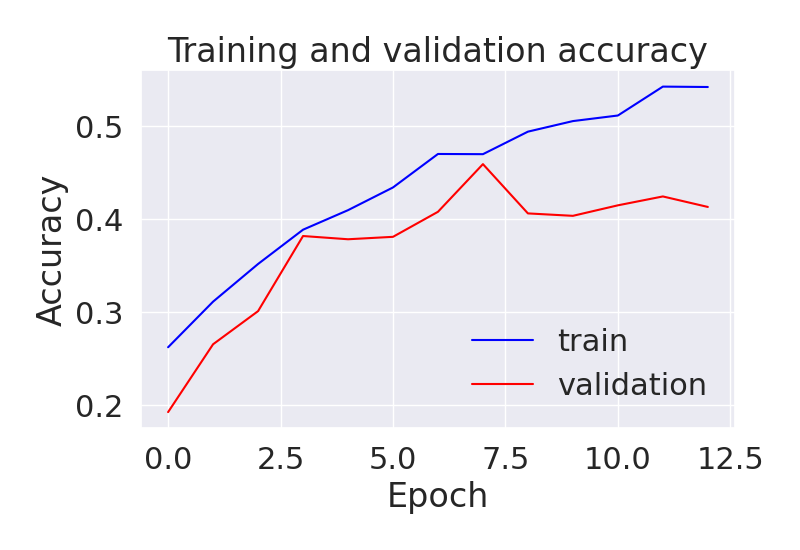

## NASNetLarge

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/NASNetLarge_cm.png


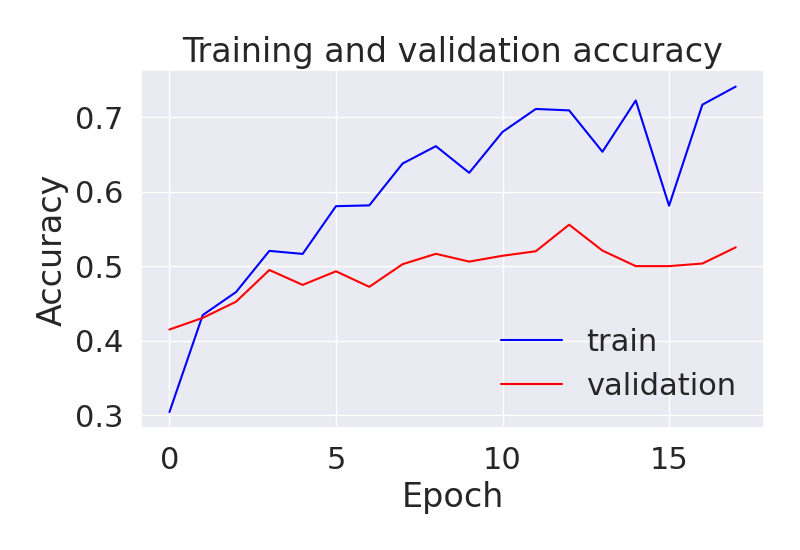

## ResNet152V2

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/ResNet152V2_cm.png


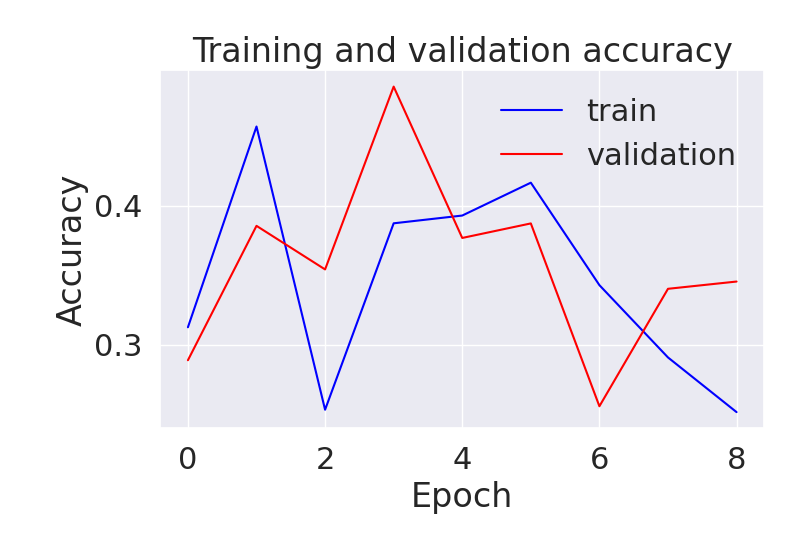

## ResNet50

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/ResNet50_cm.png


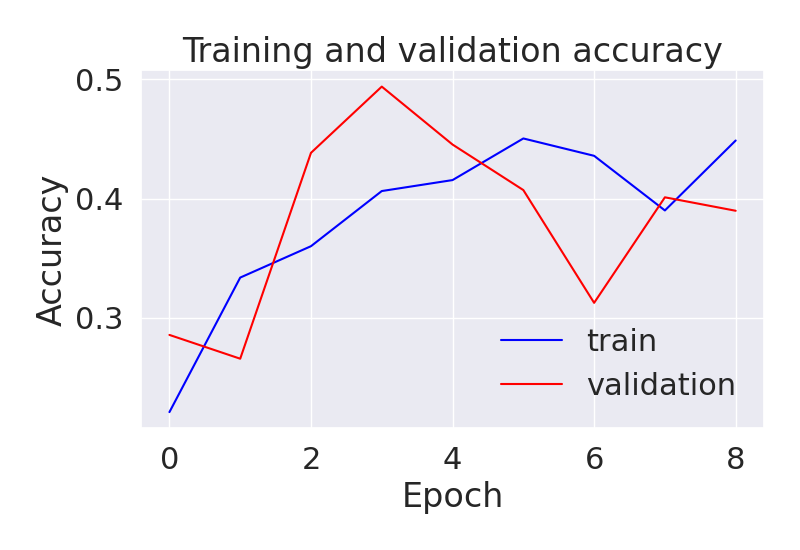

## InceptionV3

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/InceptionV3_cm.png


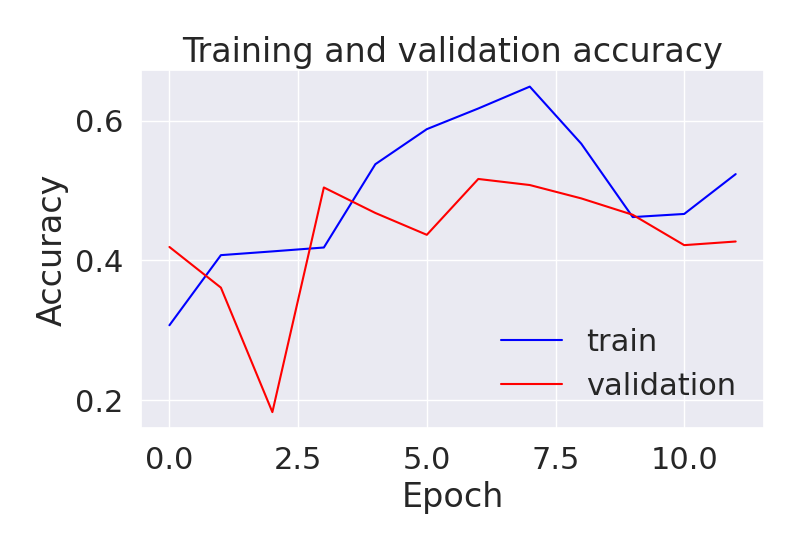

In [48]:
diags={}
for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet152V2','ResNet50','InceptionV3']:
    diags[model] = os.path.join(os.getcwd(),'data','gray',model+'_learn_plot_accuracy.png')
for model in diags:
    display(Markdown('## '+model))
    print(cms[model])
    display(Image(filename=diags[model]))

## MobileNet

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/MobileNet_cm.png


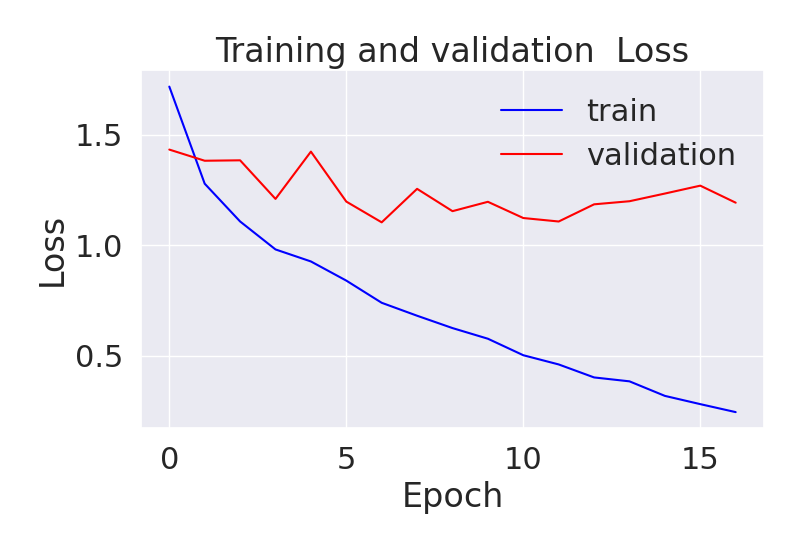

## InceptionResNetV2

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/InceptionResNetV2_cm.png


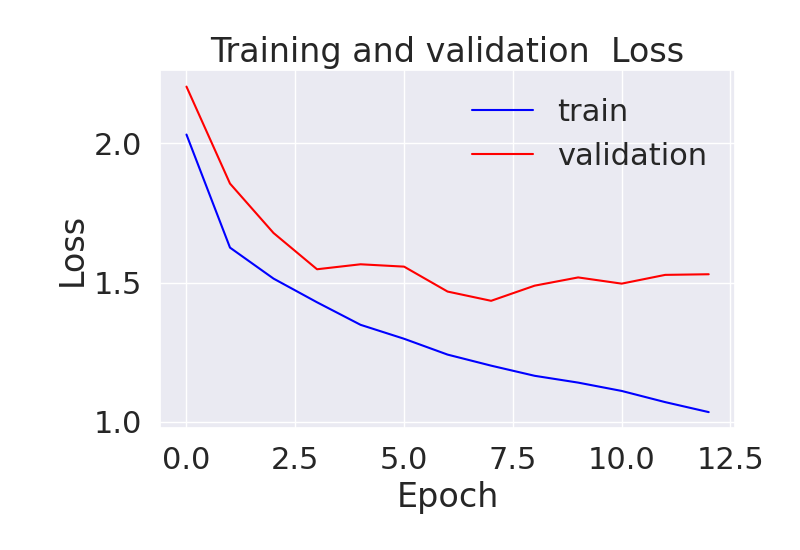

## NASNetLarge

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/NASNetLarge_cm.png


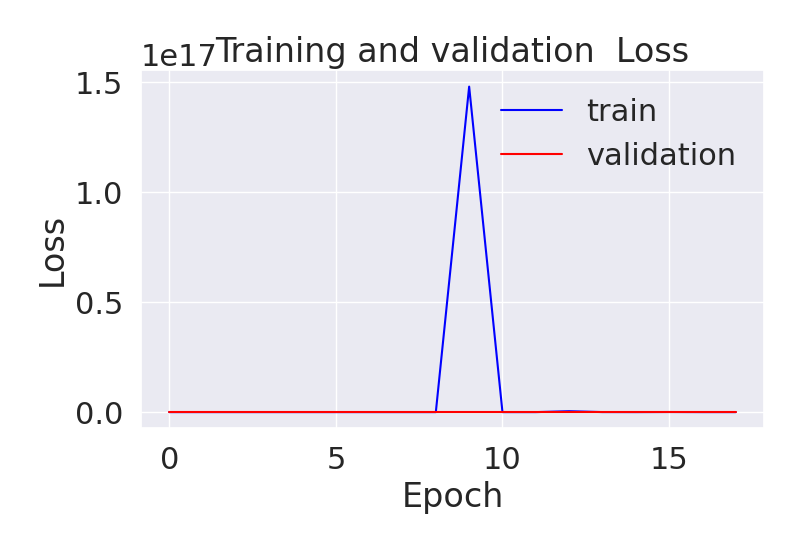

## ResNet152V2

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/ResNet152V2_cm.png


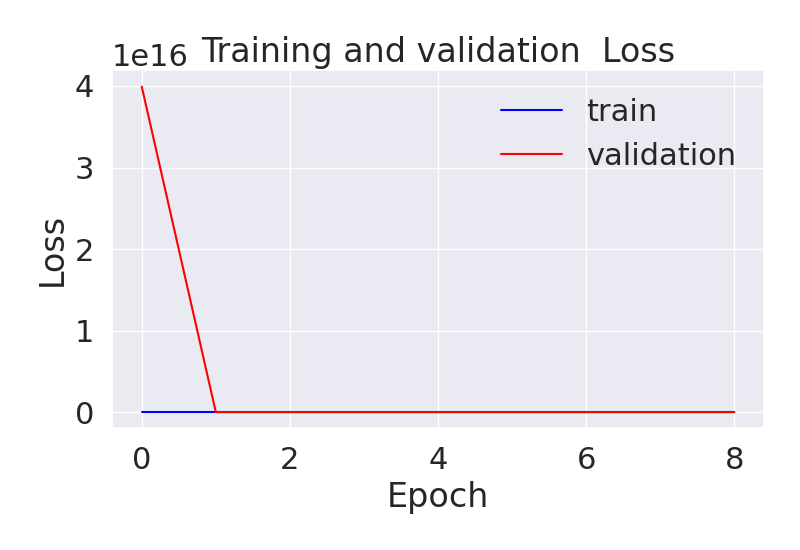

## ResNet50

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/ResNet50_cm.png


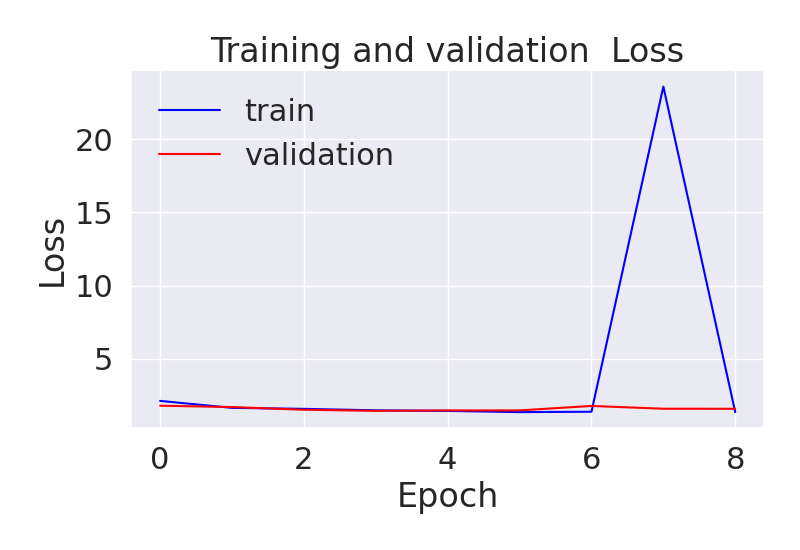

## InceptionV3

/home/labuser/deeplearning/thesis/datamanagement/dataman/notebooks/data/gray/InceptionV3_cm.png


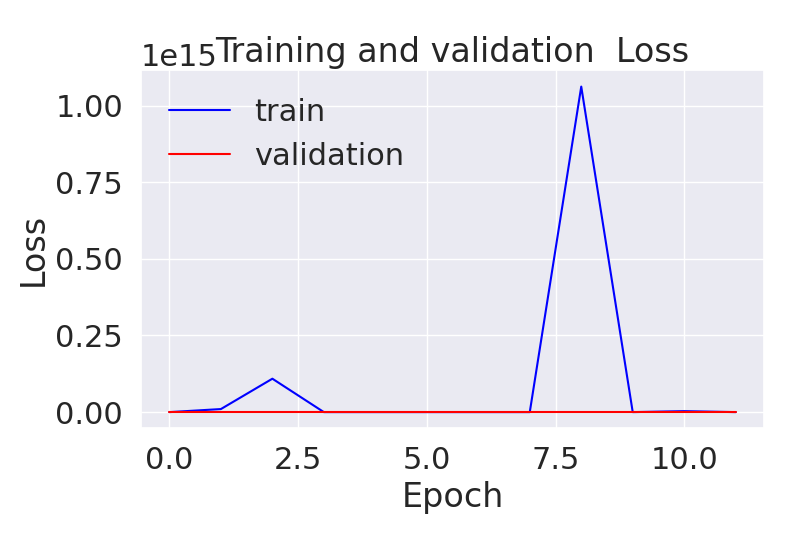

In [49]:
diags={}
for model in['MobileNet','InceptionResNetV2','NASNetLarge','ResNet152V2','ResNet50','InceptionV3']:
    diags[model] = os.path.join(os.getcwd(),'data','gray', model+'_learn_plot_loss.png')
for model in diags:
    display(Markdown('## '+model))
    print(cms[model])
    display(Image(filename=diags[model]))